In [1]:
from trainer import *

/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=================[dataset is set to adult ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[run config is loaded]=================


In [2]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3090], device='cuda:0')
epoch 0 -----------------------------------------
tensor([1.4206], device='cuda:0')
epoch 1 -----------------------------------------
tensor([1.3242], device='cuda:0')
epoch 2 -----------------------------------------
tensor([0.8205], device='cuda:0')
epoch 3 -----------------------------------------
tensor([0.9568], device='cuda:0')
epoch 4 -----------------------------------------
done


In [3]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3090], device='cuda:0')
epoch 0 -----------------------------------------
tensor([1.4206], device='cuda:0')
epoch 1 -----------------------------------------
tensor([1.3242], device='cuda:0')
epoch 2 -----------------------------------------
tensor([0.8205], device='cuda:0')
epoch 3 -----------------------------------------
tensor([0.9568], device='cuda:0')
epoch 4 -----------------------------------------
done


In [3]:
extractor = get_feature_importance_extractor()
extractor.get()

tensor([ 0.1550, -0.8710, -0.0069,  0.3865,  0.9530,  0.5466, -0.5152, -0.5235,
        -0.3083,  0.5064,  0.0573, -0.7715,  0.3267,  0.0650], device='cuda:0',
       grad_fn=<DivBackward0>)

In [4]:
train_K_fold(get_run_config())

=================[ 1 Fold ]=================
train_data: torch.Size([35166, 14])
train_label: torch.Size([35166])
validation_data: torch.Size([3907, 14])
validation_label: torch.Size([3907])
test_data: torch.Size([9769, 14])
test_label: torch.Size([9769])
-----------------------------------------


Epoch 1:  50%|████▉     | 140/282 [00:06<00:06, 20.39it/s]


KeyboardInterrupt: 

tensor([-1.0460,  0.0879,  0.9591, -0.6107, -0.1008, -0.7671,  0.0485,  0.5369,
        -0.1523, -0.2512,  1.1052,  0.0503,  0.4319, -0.2918])


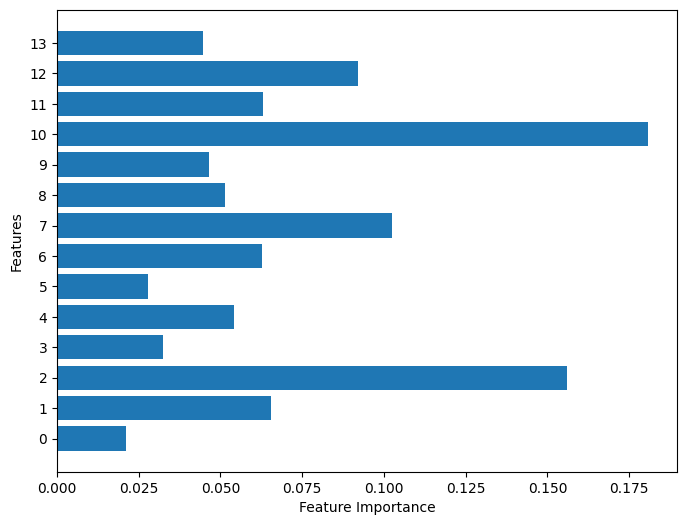

In [5]:

importance = get_feature_importance_extractor().get().cpu()
print(importance)
importance = importance.softmax(dim=0).detach().numpy()
import matplotlib.pyplot as plt
# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()